<a href="https://colab.research.google.com/github/BautistaDavid/Machine-Learning-Class-2022/blob/main/Proyecto_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Análisis Exploratorio de Datos - Prueba Análisis Economico** 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

## **Limpiemos los datos ...**

En esta sección se explorará de manera rápido los datos, se seleccionarán variables relevantes para realizar tanto algoritmo de clustering como algoritmo de predicción del puntaje global de la prueba. Para realizar este análisis se tendrá en cuenta el análisis de missing values, de los tipos de observación en cada columna.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/BautistaDavid/proyectos/main/economicas.csv')
df.columns = [i.lower() for i in df.columns]
df.head(2)

,estu_consecutivo,result_codigoprueba,result_nombreprueba,result_puntaje,result_desempeno,estu_agregado,estu_tipodocumento,estu_nacionalidad,estu_genero,estu_fechanacimiento,...,mod_comuni_escrita_desem,mod_comuni_escrita_pnal,mod_comuni_escrita_pnbc,punt_global,percentil_nbc,percentil_global,estu_inse_individual,estu_nse_individual,estu_nse_ies,estu_estadoinvestigacion
0,EK202120243329,2001,ANÁLISIS ECONÓMICO,128,2,S,CC,COLOMBIA,M,14/10/1996,...,3.0,71,57,201,95,99,51.049129,2.0,3,PUBLICAR
1,EK202120227314,2001,ANÁLISIS ECONÓMICO,209,4,S,CC,COLOMBIA,M,17/02/2001,...,4.0,100,100,222,99,100,66.866795,4.0,4,PUBLICAR


In [4]:
cols = ['estu_genero','estu_fechanacimiento','estu_depto_reside', 'fami_educacionpadre','fami_educacionmadre','estu_valormatriculauniversidad',
        'fami_estratovivienda','fami_tieneinternet','fami_tienecomputador','fami_tieneautomovil', 'estu_prgm_academico', 'estu_metodo_prgm','mod_razona_cuantitat_punt','mod_lectura_critica_punt', 
        'mod_competen_ciudada_punt', 'mod_ingles_punt', 'mod_comuni_escrita_punt','percentil_global','mod_razona_cuantitat_desem','mod_lectura_critica_desem', 
        'mod_competen_ciudada_desem', 'mod_ingles_desem', 'mod_comuni_escrita_desem', 'punt_global']

df = df[cols]
df.drop_duplicates(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 3854
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   estu_genero                     3855 non-null   object 
 1   estu_fechanacimiento            3855 non-null   object 
 2   estu_depto_reside               3855 non-null   object 
 3   fami_educacionpadre             3760 non-null   object 
 4   fami_educacionmadre             3755 non-null   object 
 5   estu_valormatriculauniversidad  3850 non-null   object 
 6   fami_estratovivienda            3721 non-null   object 
 7   fami_tieneinternet              3723 non-null   object 
 8   fami_tienecomputador            3483 non-null   object 
 9   fami_tieneautomovil             3414 non-null   object 
 10  estu_prgm_academico             3855 non-null   object 
 11  estu_metodo_prgm                3855 non-null   object 
 12  mod_razona_cuantitat_punt       38

### **MissingValues y modificación de datos**

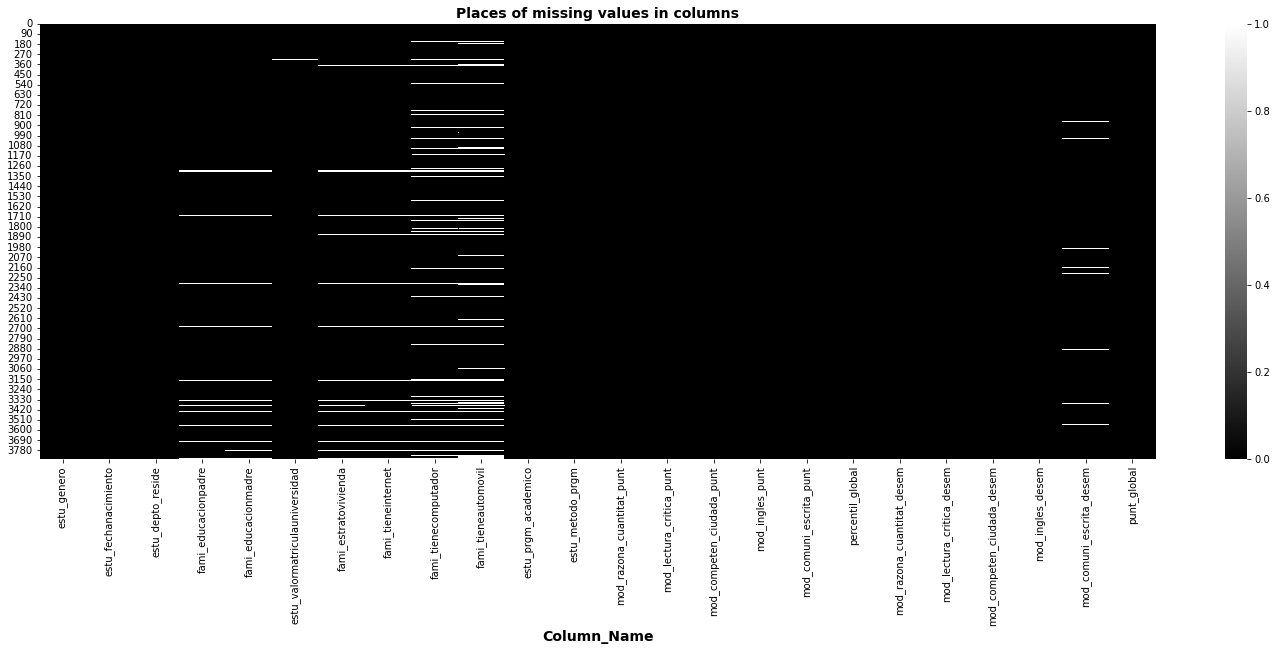

In [6]:
plt.figure(figsize=(25, 8))
sns.heatmap(df.isnull(), cbar=True, cmap='gray')   
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in columns",fontweight="bold",size=14)
plt.show()

In [7]:
def dic_depto():
    dic = {'BOGOTÁ':'Region Andina','ANTIOQUIA':'Region Andina','VALLE':'Region Pacifica',
    'CUNDINAMARCA':'Region Andina','ATLANTICO':'Region Caribe','SANTANDER':'Region Andina',
    'BOLIVAR':'Region Caribe','CORDOBA':'Region Caribe','NARIÑO':'Region Pacifica',
    'BOYACA':'Region Andina', 'MAGDALENA':'Region Caribe', 'TOLIMA':'Region Andina',
    'NORTE SANTANDER':'Region Andina','HUILA':'Region Andina','CAUCA':'Region Pacifica',
    'CESAR':'Region Caribe','META':'Region Orinoquia','SUCRE':'Region Caribe',
    'RISARALDA':'Region Andina','CALDAS':'Region Andina','LA GUAJIRA':'Region Caribe',
    'QUINDIO':'Region Andina','CASANARE':'Region Orinoquia','CHOCO':'Region Pacifica',
    'CAQUETA':'Region Amazonica','PUTUMAYO':'Region Amazonica','ARAUCA':'Region Orinoquia',
    'GUAVIARE':'Region Orinoquia','AMAZONAS':'Region Amazonica','SAN ANDRES':'Region Caribe',
    'VICHADA':'Region Orinoquia','VAUPES':'Region Amazonica','GUAINIA':'Region Amazonica'}
    return dic  


def dic_educacion():
    dic = {'Secundaria (Bachillerato) completa': 11,
            'Primaria incompleta': 3,
            'Secundaria (Bachillerato) incompleta':8,
            'Primaria completa':5,
            'Educación profesional completa':15,
            'Técnica o tecnológica completa':13,
            'No sabe':0,
            '-':0,
            'Ninguno':0,
            'Técnica o tecnológica incompleta':12,
            'Educación profesional incompleta':14,
            'Postgrado':17,
            'No Aplica':0}
    return dic

df['fami_educacionmadre'].value_counts()

Secundaria (Bachillerato) completa      762
Educación profesional completa          654
Técnica o tecnológica completa          611
Secundaria (Bachillerato) incompleta    410
Postgrado                               397
Primaria incompleta                     354
Primaria completa                       227
Educación profesional incompleta        154
Técnica o tecnológica incompleta        138
Ninguno                                  22
No sabe                                  19
No Aplica                                 7
Name: fami_educacionmadre, dtype: int64

In [8]:
df['mod_comuni_escrita_desem'] = df['mod_comuni_escrita_desem'].fillna(df['mod_comuni_escrita_desem'].mean())

df['fami_educacionpadre'] = df['fami_educacionpadre'].replace(dic_educacion())
df['fami_educacionpadre'] = df['fami_educacionpadre'].fillna(df['fami_educacionpadre'].mean())

df['fami_educacionmadre'] = df['fami_educacionmadre'].replace(dic_educacion())
df['fami_educacionmadre'] = df['fami_educacionmadre'].fillna(int(df['fami_educacionpadre'].mean()),)

df['region'] = df['estu_depto_reside'].replace(dic_depto())
df['estu_depto_reside'] = df['estu_depto_reside'].str.capitalize()

df['edad'] = [2020 - int(value.split('/')[2]) for value in df['estu_fechanacimiento']]
df['edad'] = df['edad'].replace({edad:int(df['edad'].mean()) for edad in [2018,2019,5,110,120,2,1,9,6,3,4,7,8,11,10]})

df['pago_promedio'] = df['estu_valormatriculauniversidad'].replace({'Entre 2.5 millones y menos de 4 millones':3250, 'Más de 7 millones':7000,
                                                                     'Entre 1 millón y menos de 2.5 millones':1750, 'Entre 4 millones y menos de 5.5 millones':4750,
                                                                     'Menos de 500 mil':500,'No pagó matrícula':0,'Entre 5.5 millones y menos de 7 millones':6250,
                                                                     'Entre 500 mil y menos de 1 millón':750})
df['pago_promedio'].fillna(df['pago_promedio'].mean(),inplace=True)

df['fami_estratovivienda'] = df['fami_estratovivienda'].replace({'Sin Estrato':'Estrato 0'})
df['fami_estratovivienda'] = df['fami_estratovivienda'].fillna('Estrato 3')
df['fami_estratovivienda'] = [val.split(' ')[1] for val in df['fami_estratovivienda']]
df['fami_estratovivienda'] = df['fami_estratovivienda'].astype('int8')


for i in ['fami_tieneinternet', 'fami_tienecomputador', 'fami_tieneautomovil']:
  df[i].fillna('No',inplace=True)
  df[i].replace({'Si':1,'No':0}, inplace=True)


df['estu_prgm_academico'] = df['estu_prgm_academico'].str.capitalize()
df['estu_prgm_academico'].replace({'Econom¿a':'Economía',
                                   'Economia':'Economía'},inplace=True)

otras_carreras = ['Finanzas y comercio internacional', 'Comercio exterior', 'Comercio y negocios internacionales','Negocios internacionales', 'Comercio internacional',
       'Relaciones economicas internacionales','Economia y finanzas internacionales','Finanzas y comercio exterior','Economia y negocios internacionales','Administracion de empresas']

df['estu_prgm_academico'].replace({carrera:0 for carrera in otras_carreras},inplace=True)
df['estu_economia'] = df['estu_prgm_academico'].replace({'Economía':1})

df['estu_metodo_prgm'].replace({'DISTANCIA VITUAL':'DISTANCIA'}, inplace=True)
df = pd.concat([df,pd.get_dummies(df['estu_metodo_prgm'])],axis=1)

df['estu_genero'].replace({'M':1,'F':0},inplace=True)

df = df.drop(columns=['estu_fechanacimiento','estu_valormatriculauniversidad','estu_metodo_prgm','estu_prgm_academico'])


In [9]:
df.columns = [i.lower() for i in df.columns]
df.head(2)

,estu_genero,estu_depto_reside,fami_educacionpadre,fami_educacionmadre,fami_estratovivienda,fami_tieneinternet,fami_tienecomputador,fami_tieneautomovil,mod_razona_cuantitat_punt,mod_lectura_critica_punt,...,mod_competen_ciudada_desem,mod_ingles_desem,mod_comuni_escrita_desem,punt_global,region,edad,pago_promedio,estu_economia,distancia,presencial
0,1,Cundinamarca,11.0,13.0,3,1,1,0,207,151,...,3,B2,3.0,201,Region Andina,24,3250.0,1,1,0
1,1,Bogotá,15.0,15.0,4,1,1,1,201,192,...,4,B2,4.0,222,Region Andina,19,7000.0,1,0,1


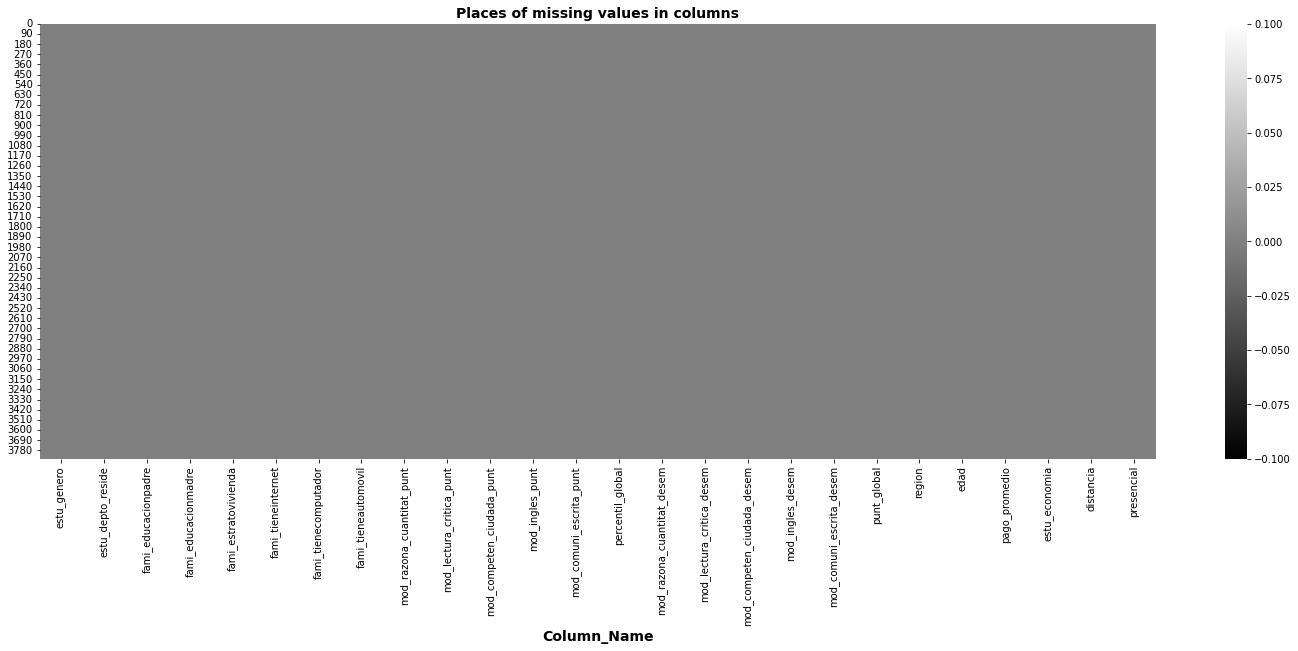

In [10]:
plt.figure(figsize=(25, 8))
sns.heatmap(df.isnull(), cbar=True, cmap='gray')  # .isnull() is going to give you a DataFrame with True or False... and remeber that ( True = 1 , False = 0)  
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in columns",fontweight="bold",size=14)
plt.show()

In [11]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print()

estu_genero
[1 0]

estu_depto_reside
['Cundinamarca' 'Bogotá' 'Atlantico' 'Valle' 'Antioquia' 'Nariño'
 'Risaralda' 'Huila' 'Santander' 'Quindio' 'Tolima' 'Caqueta' 'Magdalena'
 'Sucre' 'Norte santander' 'Bolivar' 'Boyaca' 'Meta' 'Cauca' 'Caldas'
 'Cordoba' 'Casanare' 'La guajira' 'Arauca' 'Cesar' 'Putumayo' 'Amazonas'
 'Extranjero' 'Choco' 'San andres' 'Guaviare']

fami_educacionpadre
[11.        15.         3.         5.        17.        13.
 14.         8.        12.         0.        10.1893617]

fami_educacionmadre
[13. 15.  3. 14. 11. 17.  8. 12.  0.  5. 10.]

fami_estratovivienda
[3 4 2 6 1 5 0]

fami_tieneinternet
[1 0]

fami_tienecomputador
[1 0]

fami_tieneautomovil
[0 1]

mod_razona_cuantitat_punt
[207 201 101 146 158 141 162 222 140 185 195 174 164 139 206 161 136 132
 137 150 154 199 300 192 128 197 166 156 151 159 165 215 172 178 152 135
 221 191 182 188 133 105 103 153 180 184 169 194 186 149 208 171 168 160
 155 181 122 173 126 179 189 183 119 111 138 157 144 170 120 1

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 3854
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   estu_genero                 3855 non-null   int64  
 1   estu_depto_reside           3855 non-null   object 
 2   fami_educacionpadre         3855 non-null   float64
 3   fami_educacionmadre         3855 non-null   float64
 4   fami_estratovivienda        3855 non-null   int8   
 5   fami_tieneinternet          3855 non-null   int64  
 6   fami_tienecomputador        3855 non-null   int64  
 7   fami_tieneautomovil         3855 non-null   int64  
 8   mod_razona_cuantitat_punt   3855 non-null   int64  
 9   mod_lectura_critica_punt    3855 non-null   int64  
 10  mod_competen_ciudada_punt   3855 non-null   int64  
 11  mod_ingles_punt             3855 non-null   int64  
 12  mod_comuni_escrita_punt     3855 non-null   int64  
 13  percentil_global            3855 

### **Analisis de Outliers**

In [13]:
numericals = [ 'fami_educacionpadre', 'fami_educacionmadre','mod_razona_cuantitat_punt', 'mod_lectura_critica_punt',
       'mod_competen_ciudada_punt', 'mod_ingles_punt','mod_comuni_escrita_punt', 'punt_global','edad', 'pago_promedio']
df_numerical = df[numericals]

In [14]:
def limits(serie):
  iqr = serie.quantile(q = 0.75) - serie.quantile(q = 0.25)
  return [serie.quantile(q = 0.75) + 1.5 * iqr, serie.quantile(q = 0.25) - 1.5 * iqr]

df_limites = pd.DataFrame()
for col in df_numerical.columns:
  df_limites[col] = limits(df_numerical[col])

df_limites['Limits'] = ['upper','lower']  
df_limites.set_index('Limits', inplace = True )
df_limites

,fami_educacionpadre,fami_educacionmadre,mod_razona_cuantitat_punt,mod_lectura_critica_punt,mod_competen_ciudada_punt,mod_ingles_punt,mod_comuni_escrita_punt,punt_global,edad,pago_promedio
Limits,,,,,,,,,,
upper,27.5,25.5,252.5,253.5,253.5,264.5,238.5,232.0,30.0,10750.0
lower,-8.5,-2.5,72.5,65.5,65.5,76.5,58.5,88.0,14.0,-5250.0


In [15]:
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2
import numpy as np

In [16]:
mahal_distances = []

for row in df_numerical.to_numpy():
  mahal_distances.append(mahalanobis(row, df_numerical.mean(), np.linalg.inv(np.cov(df_numerical.values.T))))

k = df.shape[0]

df['mahal_distances'] = mahal_distances 
df['p_value'] = 1 - chi2.cdf(df['mahal_distances'], k-1)

In [17]:
print(df.shape)
df = df[df['p_value'] >  0.05]
print(df.shape)

(3855, 28)
(3855, 28)


In [18]:
df.head(2)

,estu_genero,estu_depto_reside,fami_educacionpadre,fami_educacionmadre,fami_estratovivienda,fami_tieneinternet,fami_tienecomputador,fami_tieneautomovil,mod_razona_cuantitat_punt,mod_lectura_critica_punt,...,mod_comuni_escrita_desem,punt_global,region,edad,pago_promedio,estu_economia,distancia,presencial,mahal_distances,p_value
0,1,Cundinamarca,11.0,13.0,3,1,1,0,207,151,...,3.0,201,Region Andina,24,3250.0,1,1,0,5.005414,1.0
1,1,Bogotá,15.0,15.0,4,1,1,1,201,192,...,4.0,222,Region Andina,19,7000.0,1,0,1,3.879667,1.0


## **Visualización de datos**

In [19]:
pivot1 = pd.pivot_table(data = df,index =['region'], values = 'punt_global' ,columns =['estu_genero'],aggfunc = 'count')
pivot1

estu_genero,0,1
region,,
EXTRANJERO,1.0,NaN
Region Amazonica,7.0,5.0
Region Andina,1278.0,1372.0
Region Caribe,302.0,278.0
Region Orinoquia,82.0,64.0
Region Pacifica,275.0,191.0


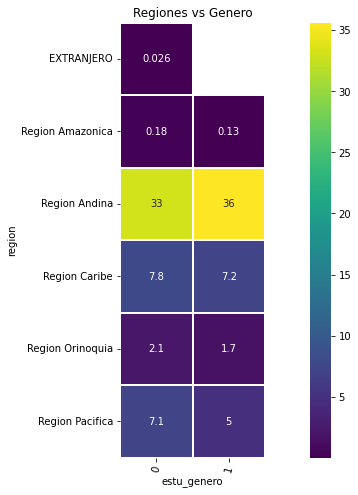

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(16,8))
# graphics_style()
plt.title('Regiones vs Genero')
plt.xticks(rotation = 75)
pivot1_heat = sns.heatmap((pivot1 *100)/len(df), cmap="viridis",linewidth=1, linecolor='w', square=True, annot = True,
                          annot_kws={"size":10})

In [21]:
pivot2 = pd.pivot_table(data = df,index =['region'], values = 'punt_global' ,columns =['estu_economia'],aggfunc = 'count')
pivot2

estu_economia,0,1
region,,
EXTRANJERO,1.0,NaN
Region Amazonica,5.0,7.0
Region Andina,815.0,1835.0
Region Caribe,102.0,478.0
Region Orinoquia,85.0,61.0
Region Pacifica,224.0,242.0


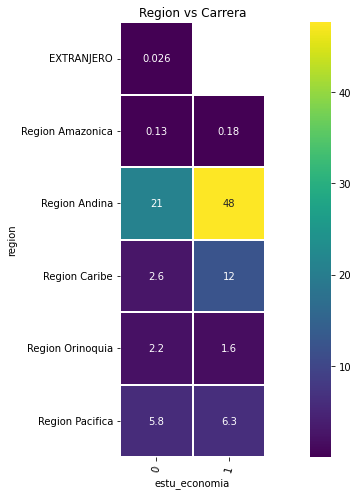

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(16,8))
# graphics_style()
plt.title('Region vs Carrera')
plt.xticks(rotation = 75)
pivot1_heat = sns.heatmap((pivot2 *100)/len(df), cmap="viridis",linewidth=1, linecolor='w', square=True, annot = True,
                          annot_kws={"size":10})

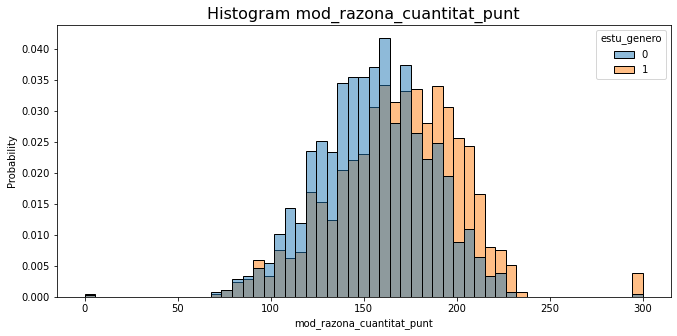

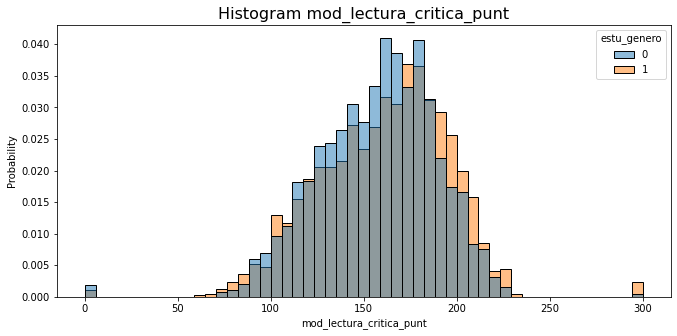

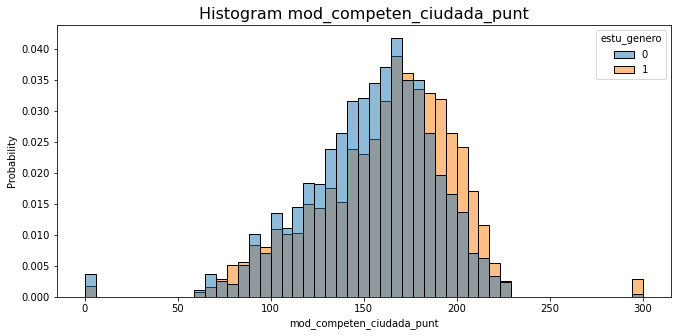

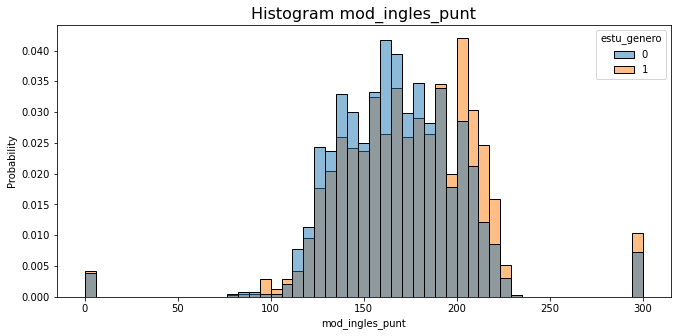

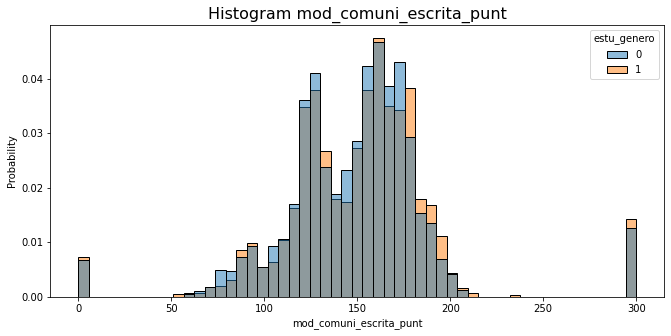

In [23]:
scores = df[['mod_razona_cuantitat_punt', 'mod_lectura_critica_punt',
       'mod_competen_ciudada_punt', 'mod_ingles_punt',
       'mod_comuni_escrita_punt']]
for i in scores.columns:
  plt.figure(figsize = (11,5))
  plt.title(f'Histogram {i}', fontsize = 16)
  sns.histplot(data = df, x = i, hue = 'estu_genero', stat = 'probability')
  plt.show()



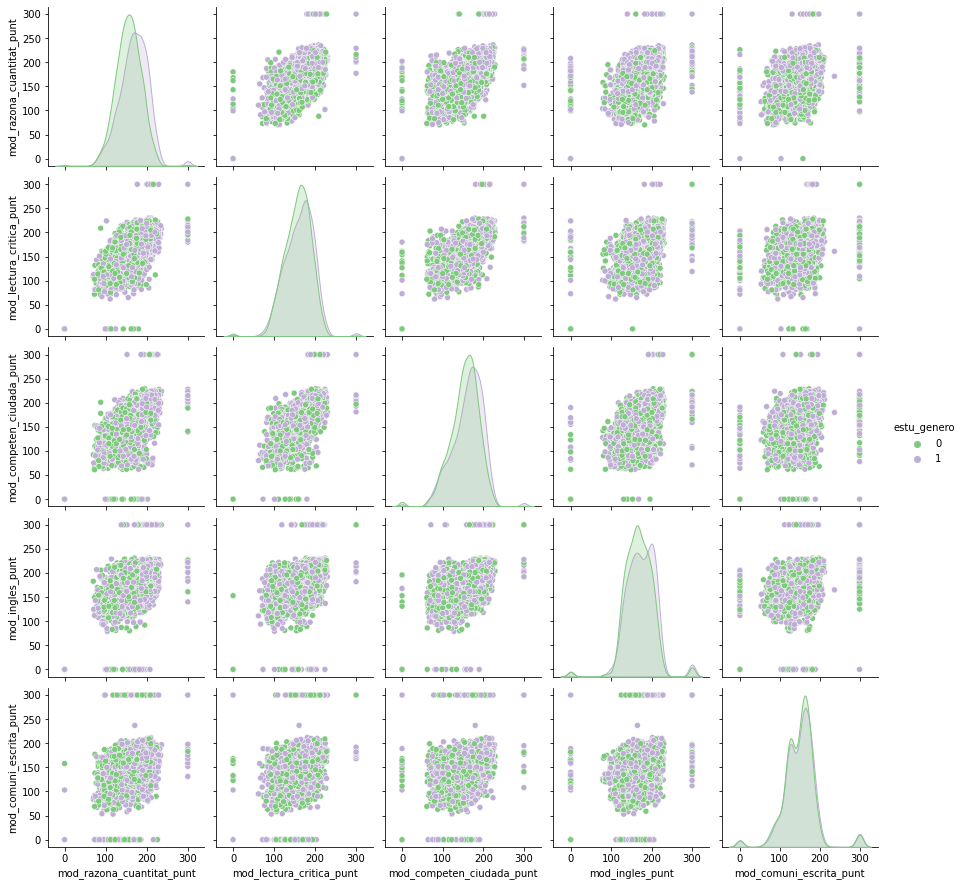

In [24]:
vars = list(scores.columns)
data_ = df[vars + ['estu_genero']]
sns.pairplot(data_,hue ='estu_genero',palette = 'Accent')

## **Configurando datos para modelos de clustering y predicción de puntajes**

In [25]:
df_pca = df[['mod_razona_cuantitat_punt', 'mod_lectura_critica_punt', 'mod_competen_ciudada_punt', 'mod_ingles_punt',  'mod_comuni_escrita_punt', 'percentil_global',
       'mod_razona_cuantitat_desem', 'mod_lectura_critica_desem',  'mod_competen_ciudada_desem','mod_comuni_escrita_desem', 'punt_global']]
df_pca.to_csv('data_pca.csv')

In [26]:
df_pca.head()

,mod_razona_cuantitat_punt,mod_lectura_critica_punt,mod_competen_ciudada_punt,mod_ingles_punt,mod_comuni_escrita_punt,percentil_global,mod_razona_cuantitat_desem,mod_lectura_critica_desem,mod_competen_ciudada_desem,mod_comuni_escrita_desem,punt_global
0,207,151,186,300,159,99,4,2,3,3.000000,201
1,201,192,206,210,300,100,3,3,4,4.000000,222
2,101,109,98,132,0,2,1,1,1,2.552749,88
3,146,186,173,187,101,71,2,3,3,1.000000,159
4,158,175,165,163,117,67,3,3,3,2.000000,156


In [27]:
df_pred_socore =  df[['estu_genero', 'fami_educacionpadre','fami_educacionmadre', 'fami_estratovivienda', 'fami_tieneinternet',
       'fami_tienecomputador', 'fami_tieneautomovil', 'region', 'edad','pago_promedio', 'estu_economia', 'distancia', 'presencial','punt_global']]
# df.columns

In [28]:
df_pred_score = pd.concat([df_pred_socore,pd.get_dummies(df['region'])],axis=1).drop(columns=['region','EXTRANJERO'])

In [29]:
df_pred_score.head(2)

,estu_genero,fami_educacionpadre,fami_educacionmadre,fami_estratovivienda,fami_tieneinternet,fami_tienecomputador,fami_tieneautomovil,edad,pago_promedio,estu_economia,distancia,presencial,punt_global,Region Amazonica,Region Andina,Region Caribe,Region Orinoquia,Region Pacifica
0,1,11.0,13.0,3,1,1,0,24,3250.0,1,1,0,201,0,1,0,0,0
1,1,15.0,15.0,4,1,1,1,19,7000.0,1,0,1,222,0,1,0,0,0


In [30]:
df_pred_score.to_csv('data_proyecto9.csv', index=False)